# Core

> Core functions

In [8]:
#| default_exp core

In [9]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [10]:
#| export
from fastai.vision.all import *
from fastai.data.all import *

def get_gt(path, gt_file_name="avg50.png"): 
    def _fn(fn): return Path(path/"gt")/f"{parent_label(fn)}"/gt_file_name
    return _fn

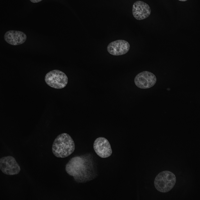

In [11]:
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
fnames = get_image_files(path_train_raw)

my_get_gt = get_gt(path)
Image.open(my_get_gt(fnames[0])).to_thumb(200)

In [12]:
#| export
from random import randint

def get_noisy_pair(fn):
    tmp = get_image_files(fn.parent, recurse=False)
    fn2 = tmp[randint(0,len(tmp)-1)]
    while fn2 == fn: fn2 = tmp[randint(0,len(tmp)-1)]
    return fn2

In [13]:
fnames1 = fnames[0]
print(fnames1)
fnames2 = get_noisy_pair(fnames1)
print(fnames2)

../_data/Confocal_BPAE_B/raw/7/HV110_P0500510020.png
../_data/Confocal_BPAE_B/raw/7/HV110_P0500510032.png


In [14]:
#| hide
import nbdev; nbdev.nbdev_export()